#### ИУ5-65Б Погосян С.Л. РК1
Вар №16
<br>Номер задачи - 2, номер набора данных - 8

Рубежный контроль №1
Задание
Для заданного набора данных проведите обработку пропусков в данных для
одного категориального и одного количественного признака. Какие способы
обработки пропусков в данных для категориальных и количественных
признаков Вы использовали? Какие признаки Вы будете использовать для
дальнейшего построения моделей машинного обучения и почему?
Набор данных: https://www.kaggle.com/mathan/fifa-2018-match-statistics

Дополнительное требование:
Для студентов групп ИУ5-65Б — для набора данных построить «парные диаграммы»

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загружаем данные:

In [2]:
data = pd.read_csv('FIFA_2018.csv', sep=",")

In [3]:
# размер набора данных
data.shape

(128, 27)

In [4]:
# типы колонок
data.dtypes

Date                       object
Team                       object
Opponent                   object
Goal Scored                 int64
Ball Possession %           int64
Attempts                    int64
On-Target                   int64
Off-Target                  int64
Blocked                     int64
Corners                     int64
Offsides                    int64
Free Kicks                  int64
Saves                       int64
Pass Accuracy %             int64
Passes                      int64
Distance Covered (Kms)      int64
Fouls Committed             int64
Yellow Card                 int64
Yellow & Red                int64
Red                         int64
Man of the Match           object
1st Goal                  float64
Round                      object
PSO                        object
Goals in PSO                int64
Own goals                 float64
Own goal Time             float64
dtype: object

In [5]:
# определим пропуски в столбцах
data.isnull().sum()

Date                        0
Team                        0
Opponent                    0
Goal Scored                 0
Ball Possession %           0
Attempts                    0
On-Target                   0
Off-Target                  0
Blocked                     0
Corners                     0
Offsides                    0
Free Kicks                  0
Saves                       0
Pass Accuracy %             0
Passes                      0
Distance Covered (Kms)      0
Fouls Committed             0
Yellow Card                 0
Yellow & Red                0
Red                         0
Man of the Match            0
1st Goal                   34
Round                       0
PSO                         0
Goals in PSO                0
Own goals                 116
Own goal Time             116
dtype: int64

In [6]:
# Первые 10 строк датасета
data.head(10)

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
5,15-06-2018,Iran,Morocco,1,36,8,2,5,1,2,...,3,0,0,Yes,90.0,Group Stage,No,0,NaN,NaN
6,15-06-2018,Portugal,Spain,3,39,8,3,2,3,4,...,1,0,0,No,4.0,Group Stage,No,0,NaN,NaN
7,15-06-2018,Spain,Portugal,3,61,12,5,5,2,5,...,1,0,0,Yes,24.0,Group Stage,No,0,NaN,NaN
8,16-06-2018,France,Australia,2,51,12,5,4,3,5,...,1,0,0,Yes,58.0,Group Stage,No,0,NaN,NaN
9,16-06-2018,Australia,France,1,49,4,1,2,1,1,...,3,0,0,No,62.0,Group Stage,No,0,1.0,81.0


In [7]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 128


### Обработка пропуков в числовых данных

In [8]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    dt = str(data[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка 1st Goal. Тип данных float64. Количество пустых значений 34, 26.56%.
Колонка Own goals. Тип данных float64. Количество пустых значений 116, 90.62%.
Колонка Own goal Time. Тип данных float64. Количество пустых значений 116, 90.62%.


#### В колонках Own goals и Own goals содержится информация о наличии забитых голов в свои ворота и времени, когда это было сделано. Будем считать, что отсутствие информации говорит о том, что не было мячей забитых в свои ворота. Поэтому заполним пропуски в этих колонках нулями.

In [9]:
# Заполнение всех пропущенных значений в "Own goals" нулями
data_new_3 = data[['Own goals']].fillna(0)

In [10]:
data[['Own goals']]=data_new_3

In [11]:
# Заполнение всех пропущенных значений в "Own goal Time" нулями
data_new_4 = data[['Own goal Time']].fillna(0)

In [12]:
data[['Own goal Time']]=data_new_4

In [13]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,0.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,NaN,Group Stage,No,0,0.0,0.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,NaN,Group Stage,No,0,0.0,0.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,0.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0


#### В колонке 1st goal содержится информация о времени от начала игры, в которое был забит первый гол. Поэтому заполним пропуски нулями в тех строках, где значение "Goal Scored" ранво нулю.

In [14]:
data.loc[(data['Goal Scored'] == 0), '1st Goal'] = 0

#### Заполним оставшиеся пропуски в столбце "1st Goal" средним значением по столбцу. 

In [15]:
data[['1st Goal']].describe()

,1st Goal
count,127.000000
mean,29.204724
std,27.289552
min,0.000000
25%,0.000000
50%,24.000000
75%,51.000000
max,90.000000


In [16]:
res = np.where(np.isnan(data['1st Goal']), np.ma.array(data['1st Goal'],

               mask = np.isnan(data['1st Goal'])).mean(axis = 0), data['1st Goal'])  

In [17]:
data['1st Goal']=res

In [18]:
data.head()

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,...,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,...,0,0,0,Yes,12.0,Group Stage,No,0,0.0,0.0
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,...,0,0,0,No,0.0,Group Stage,No,0,0.0,0.0
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,...,2,0,0,No,0.0,Group Stage,No,0,0.0,0.0
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,...,0,0,0,Yes,89.0,Group Stage,No,0,0.0,0.0
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,...,1,0,0,No,0.0,Group Stage,No,0,1.0,90.0


In [19]:
# проверим пропуски в столбцах
data.isnull().sum()

Date                      0
Team                      0
Opponent                  0
Goal Scored               0
Ball Possession %         0
Attempts                  0
On-Target                 0
Off-Target                0
Blocked                   0
Corners                   0
Offsides                  0
Free Kicks                0
Saves                     0
Pass Accuracy %           0
Passes                    0
Distance Covered (Kms)    0
Fouls Committed           0
Yellow Card               0
Yellow & Red              0
Red                       0
Man of the Match          0
1st Goal                  0
Round                     0
PSO                       0
Goals in PSO              0
Own goals                 0
Own goal Time             0
dtype: int64

# Парные диаграммы

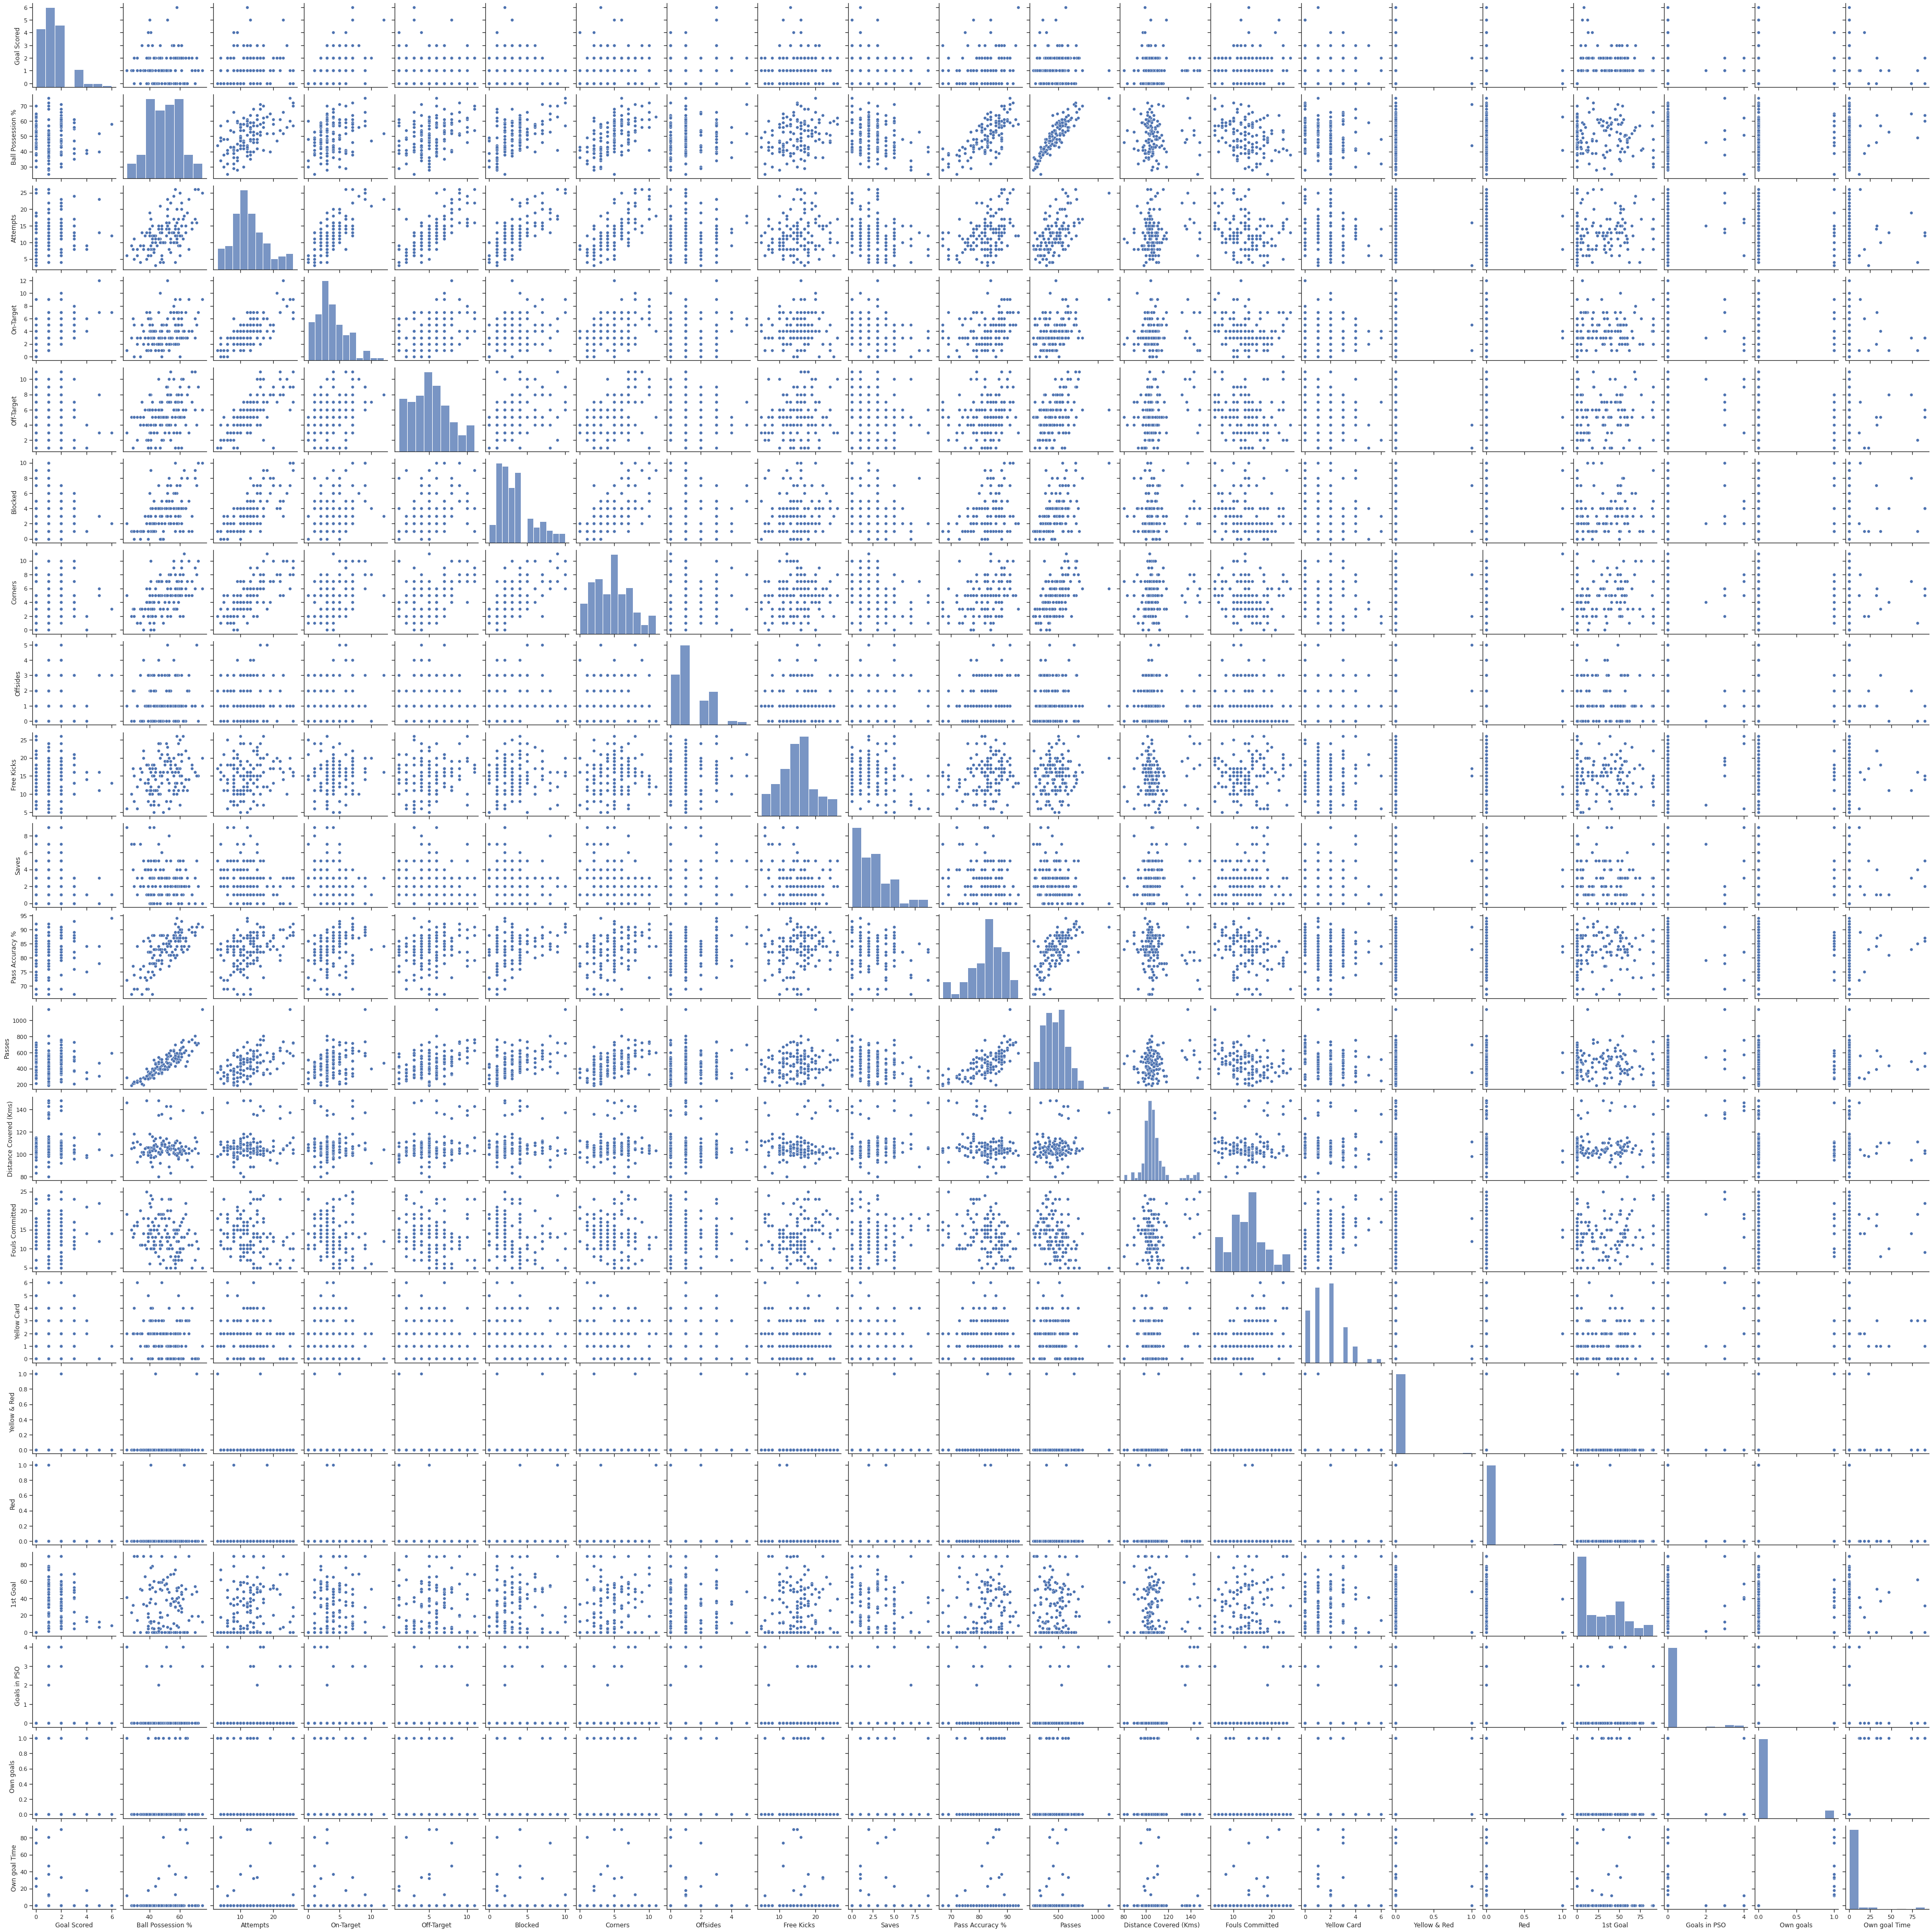

In [20]:
sns.pairplot(data)